In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from gw_signal_tools.waveform import (
    get_wf_generator,
    time_phase_wrapper,
    optimize_overlap,
)
from gw_signal_tools.fisher import FisherMatrix

/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


The pyseobnr package has failed to load, you will not be able to employ SEOBNRv5 approximants.


In [2]:
import lalsimulation.gwsignal.core.parameter_conventions as pc

# Make sure mass1 and mass2 are not in default_dict (makes messy behaviour)
pc.default_dict.pop('mass1', None)
pc.default_dict.pop('mass2', None);

In [3]:
from gw_signal_tools import PLOT_STYLE_SHEET

plt.style.use(PLOT_STYLE_SHEET)

In [4]:
f_min = 20.0 * u.Hz
f_max = 1024.0 * u.Hz
delta_f = 2**-6 * u.Hz
delta_t = 1.0 / 4096.0 * u.s
f_ref = f_min  # Frequency where we specify spins


wf_params = {
    'total_mass': 50.0 * u.Msun,
    'mass_ratio': 0.5 * u.dimensionless_unscaled,
    'f22_start': f_min,
    'f_max': f_max,
    'deltaF': delta_f,
    'f22_ref': f_ref,
    'phi_ref': 0.0 * u.rad,
    'distance': 440.0 * u.Mpc,
    'inclination': 0.0 * u.rad,
    'time': 0.0 * u.s,
    'phase': 0.0 * u.rad,
    'condition': 0,
}

# Fisher Matrix Testing

In this notebook we provide a few sanity checks to make sure that our Fisher matrix code works as expected.

## Recovering $M$-Bias

As a first sanity check we look at something that is also one of the most interesting applications of Fisher matrices, namely systematic biases.
We will test how well we can recover artificial biases between waveform models using the ``FisherMatrix`` class.

In [5]:
approximant = 'IMRPhenomXPHM'
wf_gen = time_phase_wrapper(get_wf_generator(approximant))

/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/lalsimulation/gwsignal/core/waveform.py:226: UserWarning: This code is currently UNREVIEWED, use with caution!
  warnings.warn("This code is currently UNREVIEWED, use with caution!")


In [6]:
M_shift = 0.2 * u.Msun
# M_shift = 2.*u.Msun


def shifted_wf_gen(wf_params):
    return wf_gen(wf_params | {'total_mass': wf_params['total_mass'] - M_shift})

In [ ]:
wf1_shifted, wf2_shifted, opt_params = optimize_overlap(
    wf_params,
    wf_gen,
    shifted_wf_gen,
    opt_params=['total_mass', 'time', 'phase'],
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is

When including time and phase in the optimization, the mismatch as a function of $M$-shift is much smoother and does not oscillate, so that higher shifts can be recovered.

In [ ]:
fisher_M_bias = FisherMatrix(
    wf_params,
    ['total_mass', 'time', 'phase'],
    shifted_wf_gen,
    direct_computation=False,
)

sys_bias_M_bias_non_opt = fisher_M_bias.systematic_bias(
    wf_gen,
    optimize=False,
)


sys_bias_M_bias_opt, opt_info = fisher_M_bias.systematic_bias(
    wf_gen,
    optimize=['time', 'phase'],
    return_diagnostics=True,
)


sys_bias_M_bias_M_opt, M_opt_info = fisher_M_bias.systematic_bias(
    wf_gen,
    optimize=['total_mass', 'time', 'phase'],
    return_diagnostics=True,
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is

In [9]:
print(M_shift)
print(opt_params['total_mass'] - wf_params['total_mass'])
print(sys_bias_M_bias_non_opt[0, 0])
print(sys_bias_M_bias_opt[0, 0])
print(sys_bias_M_bias_M_opt[0, 0])

0.2 solMass
0.1999664306640625 solMass
0.1865160156848754 solMass
0.19703780911054533 solMass
0.20000113630633365 solMass


As we can see, all of the calculated shifts are really close to the expected result of $0.2 M_\odot$ - great!
Next, let us push the limits of this application and find out how large the shifts can become before we cannot recover them anymore (due to the LSA becomes a bad approximation).

In [10]:
M_shift_from_opt = []
M_bias_non_opt = []
M_bias_opt = []
M_bias_M_opt = []

M_shifts = np.linspace(1e-2, 0.8, num=10) * u.Msun


wf1 = wf_gen(wf_params)

for shift in M_shifts:

    def shifted_wf_gen(wf_params):
        return wf_gen(wf_params | {'total_mass': wf_params['total_mass'] - shift})

    _, _, opt_params = optimize_overlap(
        wf_params,
        wf_gen,
        shifted_wf_gen,
        opt_params=['total_mass', 'time', 'phase'],
    )

    M_shift_from_opt += [
        (
            opt_params['total_mass'] - wf_params['total_mass']
        ).value  # Otherwise error when reshaping
    ]

    fisher_M_bias = FisherMatrix(
        wf_params,
        ['total_mass', 'time', 'phase'],
        shifted_wf_gen,
        direct_computation=False,
    )

    M_bias_non_opt += [
        fisher_M_bias.systematic_bias(
            wf_gen,
            'total_mass',
            optimize=False,
        )
    ]

    M_bias_opt += [
        fisher_M_bias.systematic_bias(
            wf_gen,
            'total_mass',
            optimize=['time', 'phase'],
        )
    ]

    M_bias_M_opt += [
        fisher_M_bias.systematic_bias(
            wf_gen,
            'total_mass',
            optimize=['total_mass', 'time', 'phase'],
        )
    ]

M_shift_from_opt = np.reshape(M_shift_from_opt, -1)
M_bias_non_opt = np.reshape(M_bias_non_opt, -1)
M_bias_opt = np.reshape(M_bias_opt, -1)
M_bias_M_opt = np.reshape(M_bias_M_opt, -1)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is

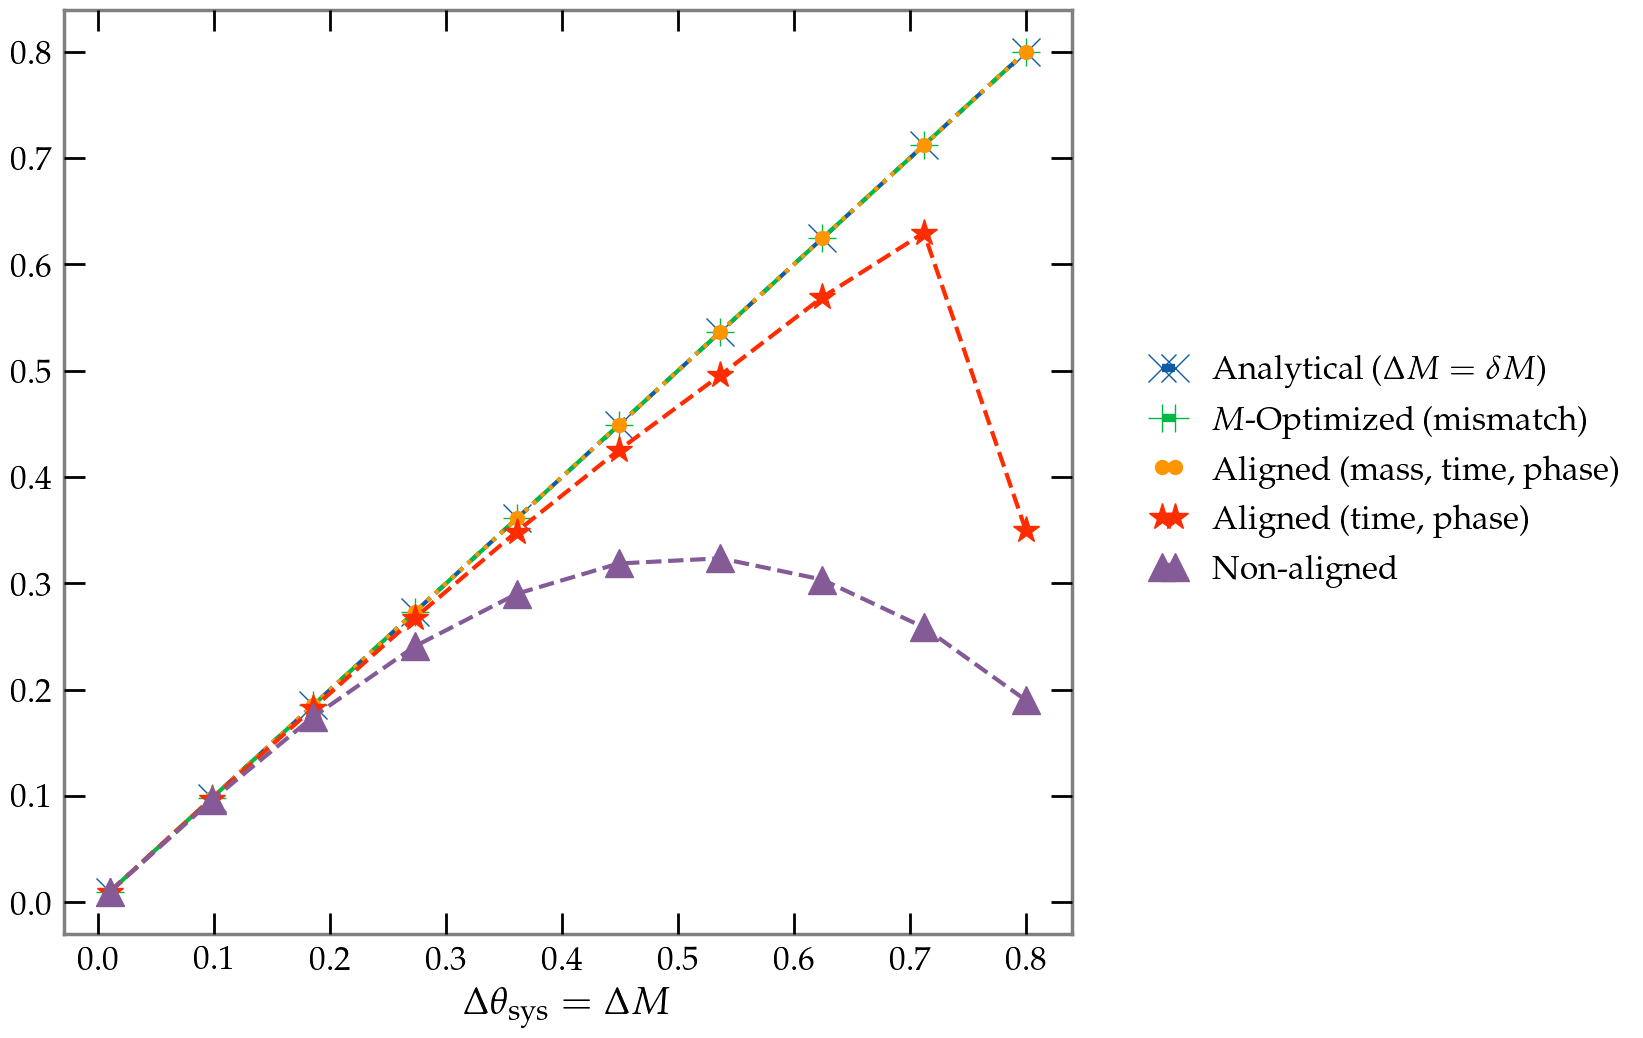

In [11]:
plt.plot(M_shifts, M_shifts, 'x--', label='Analytical ($\Delta M = \delta M$)')
plt.plot(M_shifts, M_shift_from_opt, '+-.', label='$M$-Optimized (mismatch)')
plt.plot(M_shifts, M_bias_M_opt, '.:', label='Aligned (mass, time, phase)')
plt.plot(M_shifts, M_bias_opt, '*--', label='Aligned (time, phase)')
plt.plot(M_shifts, M_bias_non_opt, '^--', label='Non-aligned')

plt.xlabel(r'$\delta M$')
plt.xlabel(r'$\Delta \theta_\mathrm{sys} = \Delta M$')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.grid(False)

plt.show()

These curves are pretty much expected in that manner.
For small biases, all formulas work reasonably well, but for larger ones the performance degrades.
Moreover, the aligned formula works better than the non-aligned one.

Lastly, and perhaps not surprisingly, optimizing over $M$ in the systematic error calculation yields exact results.
(Just like the results coming from optimizing mismatches over the total mass do.)

## Recovering Waveform Distances

Another sanity check (the practical usecases of which not super clear to me, but may exist; anyway...) is to calculate distances between waveforms and ensure that the results agree (at least in the linear regime) with what we get from Fisher matrices.

The distance we are talking about here is $$||h_1 - h_2|| = ||h(\theta_1) - h(\theta_2)|| \, .$$ If the waveforms produced by $\theta_1, \theta_2$ are sufficiently similar, then we this distance is well approximated by $$||h_1 - h_2|| = ||h(\theta_1) - h(\theta_2)|| \simeq \sqrt{\Gamma_{\mu \nu} (\theta_1 - \theta_2)^2} \, ,$$ i.e. by something that we can calculate using Fisher matrices $\Gamma_{\mu \nu} = \langle \partial_\mu h, \partial_\nu h \rangle$.

In [12]:
from gw_signal_tools.fisher import distance, linearized_distance

In [13]:
M_center_val = wf_params['total_mass']

M_range = u.Quantity([0.9 * M_center_val, 1.1 * M_center_val])

In [14]:
approximant = 'IMRPhenomXPHM'
wf_gen = time_phase_wrapper(get_wf_generator(approximant))

/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/lalsimulation/gwsignal/core/waveform.py:226: UserWarning: This code is currently UNREVIEWED, use with caution!
  warnings.warn("This code is currently UNREVIEWED, use with caution!")


In [15]:
M_distance_non_opt = distance(
    'total_mass',
    M_range,
    wf_params,
    param_step_size=5e-3 * M_center_val,
    distance_kind='diff_norm',
    wf_generator=wf_gen,
    min_dt_prec=1e-6,
    df=2**-2,
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is

In [16]:
M_approx_distance_non_opt = linearized_distance(
    'total_mass',
    M_range,
    wf_params,
    param_step_size=5e-3 * M_center_val,
    wf_generator=wf_gen,
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is

In [17]:
M_range_2 = u.Quantity([0.98 * M_center_val, 1.02 * M_center_val])

M_distance_2 = distance(
    'total_mass',
    M_range_2,
    wf_params,
    param_step_size=1e-3 * M_center_val,
    distance_kind='mismatch_norm',
    wf_generator=wf_gen,
    optimize_time_and_phase=True,
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is

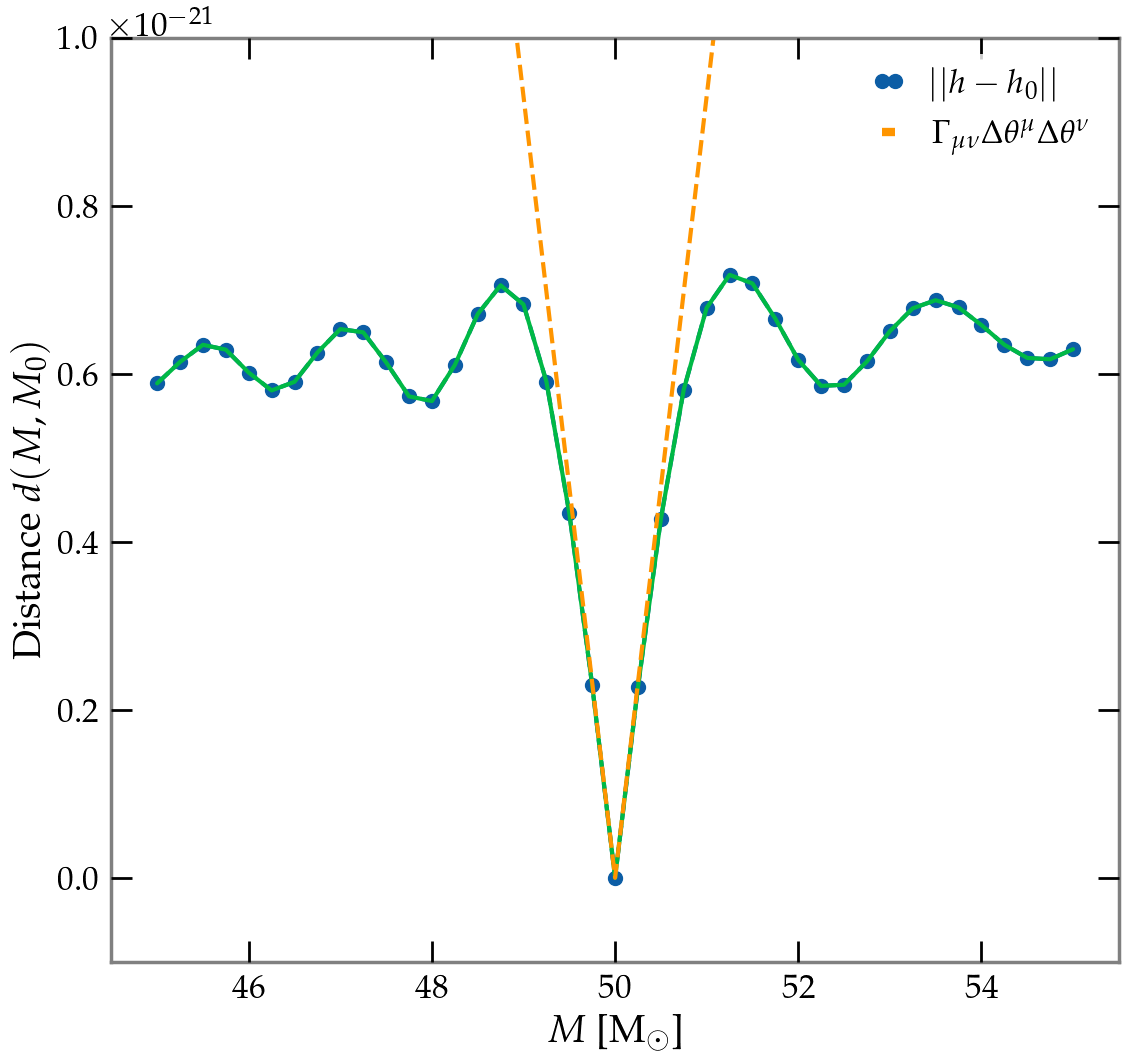

In [18]:
plt.plot(M_distance_non_opt, '.--', label='$||h - h_0||$')
plt.plot(M_distance_non_opt, '-')
plt.plot(
    M_approx_distance_non_opt,
    '--',
    label=r'$\Gamma_{\mu\nu} \Delta\theta^\mu \Delta\theta^\nu$',
)

plt.xlabel(f'$M$ [{M_center_val.unit:latex}]')
plt.ylabel('Distance $d(M, M_0)$')
plt.ylim(-1e-22, 1e-21)

plt.legend()
plt.grid(False)

plt.show()

Similar to the systematic bias calculation, things work well as long as we are in the linear regime - which is the expected result, great!

The following, slightly more involved, setup involves a distance where we optimize over certain parameters, in our case relative time and phase shifts.
We can account for this in the Fisher matrix results by projecting these parameters.

In [19]:
M_distance_opt = distance(
    'total_mass',
    M_range,
    wf_params,
    param_step_size=5e-3 * M_center_val,
    distance_kind='diff_norm',
    wf_generator=wf_gen,
    optimize_time_and_phase=True,
    min_dt_prec=1e-6,
    df=2**-2,
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is

In [20]:
M_approx_distance_opt = linearized_distance(
    ['total_mass', 'time', 'phase'],
    M_range,
    wf_params,
    param_step_size=5e-3 * M_center_val,
    wf_generator=wf_gen,
    params_to_project=['time', 'phase'],
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:832): This code is

Clearly, projected Fisher has much smaller values, which will correspond to much smaller distances. This is not unexpected, there is no need for results to agree with Fisher calculated using optimized inner product. It should, however, agree with distance with optimization.

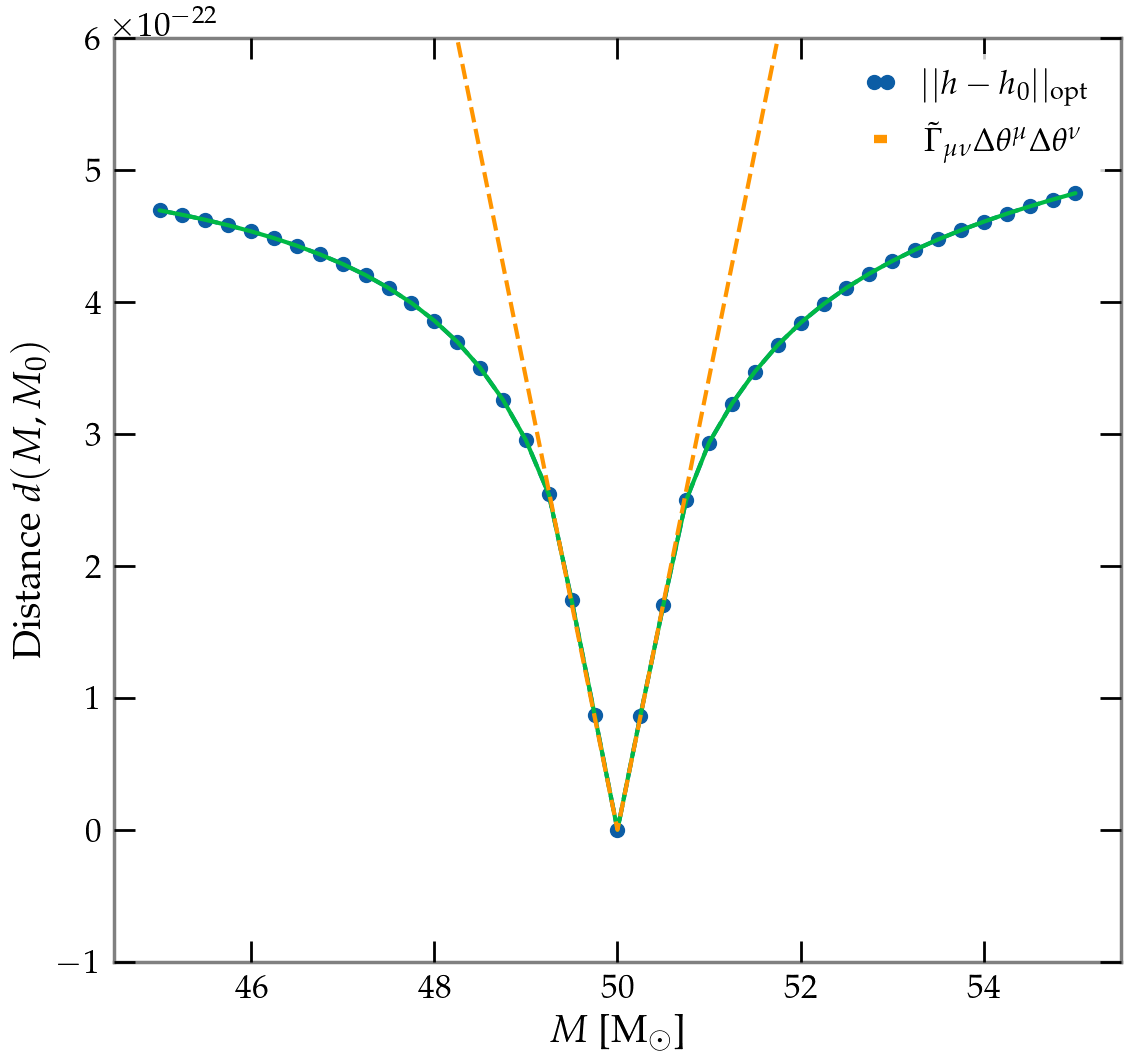

In [21]:
plt.plot(M_distance_opt, '.--', label=r'$||h - h_0||_\mathrm{opt}$')
plt.plot(M_distance_opt, '-')
plt.plot(
    M_approx_distance_opt,
    '--',
    label=r'$\tilde{\Gamma}_{\mu\nu} \Delta\theta^\mu \Delta\theta^\nu$',
)

plt.xlabel(f'$M$ [{M_center_val.unit:latex}]')
plt.ylabel('Distance $d(M, M_0)$')
plt.ylim(-1e-22, 6e-22)

plt.legend()
plt.grid(False)

plt.show()

Same result as before, so this works as well.